In [10]:
import rebalance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
securities = ['appl', 'c', 'gs']

# Desired allocation
target = np.asarray([0.31, 0.18, 0.11])

# Prices of assets
px = np.asarray([100.0, 25.0, 3.22])

# We have $1,000 to spend
pf_value = 1_000

# Hold 20% cash
pct_cash = 0.2

cash, shares = rebalance.optimal_portfolio(
    px = px,
    target = target,
    market_value = pf_value,
    pct_cash = pct_cash,
)


      shares   price  value
appl     4.0  100.00  400.0
c        8.0   25.00  200.0
gs      45.0    3.22  144.9
cash   255.1    1.00  255.1


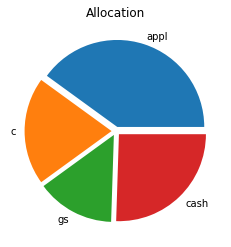

In [44]:
pf = pd.DataFrame(
    index=securities + ['cash'],
    data={
        'shares': list(shares) + [cash],
        'price': px.tolist() + [1.0],
    }
)
pf['value'] = pf['shares'] * pf['price']

print(pf)

plt.pie(
    pf['value'],
    explode = [0.05] * len(pf),
    labels = pf.index,
)
plt.gca().set_title('Allocation')
plt.plot()
None

In [55]:
new_alloc = np.asarray([0, 0, 0.5])
new_pct_cash = 0.5


cash_change, shares_buy = rebalance.rebalance(
    px = px,
    target = new_alloc,
    market_value = pf_value,
    pct_cash = new_pct_cash,
    shares = shares,
    cash = cash
)

for sym, ds in zip(securities, shares_buy):
    if ds < 0:
        print('Sell {0} of {1}'.format(abs(ds), sym))
    elif ds > 0:
        print('Buy {0} of {1}'.format(abs(ds), sym))
        


Sell 3.0 of appl
Sell 6.0 of c
Buy 48.0 of gs


      shares   price   value
appl    1.00  100.00  100.00
c       2.00   25.00   50.00
gs     93.00    3.22  299.46
cash  550.54    1.00  550.54


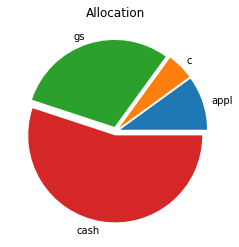

In [56]:
pf = pd.DataFrame(
    index=securities + ['cash'],
    data={
        'shares': np.asarray(list(shares) + [cash]) + np.asarray(list(shares_buy) + [cash_change]),
        'price': px.tolist() + [1.0],
    }
)
pf['value'] = pf['shares'] * pf['price']

print(pf)

plt.pie(
    pf['value'],
    explode = [0.05] * len(pf),
    labels = pf.index,
)
plt.gca().set_title('New Allocation')
plt.plot()
None